# Imports des bibliothèques

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Pour les réseaux de neurones feed-forward
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Pour le découpage des échantillons
from sklearn.model_selection import train_test_split

# Fonctions de base


In [40]:
def genere_X(n,trou,corrupt):
  #  Si trou <= 0 : Genere un echantillon uniforme sur [0,1]
  #  Si (0< trou <0.5) : Genere un échantillon dont le support est dans [0,trou] U [1-trou, 1]
  #  Si (0< trou <0.5) et (corrupt != 0) : ajoute un example 0.5
    X = np.zeros(n)

    if (trou > 0) & (trou < 0.5):
        n2 = math.floor(n/2)
        X[0:n2] =  np.random.uniform(0, trou, n2)
        X[n2:] = np.random.uniform(1- trou , 1, n2)
        if (corrupt != 0):
            X[np.random.randint(0, n)] = 0.5
    else :
        X = np.random.uniform(0, 1, n)

    return X.reshape(-1, 1)
################################################################
def genere_Y(X,f,corrupt_value, noise_variance):
    # Genere Y suivant la fonction cosinus de frequence f
    # Si une entrée de X vaut exactement 0.5, le Y correspondant vaut corrupt_value
    Y =  np.cos(f*X) + noise_variance * np.random.randn(X.shape[0], 1)

    indices = np.where(X == 0.5)[0]
    if indices.size > 0:
        Y[indices] = corrupt_value

    return Y
################################################################
def genere_NN_dense(X,taille_output,largeur,profondeur):
    # X : sert à donner la taille de la couche d'entrée
    # taille_output : donne la taille de la couche de sortie
    # largeur : c'est la largeur des couches cachées
    # profondeur : Le nombre de couches cachées

    model = Sequential()   #crée un réseau de neurone vide
    for i in range(profondeur):      # crée les couches cachées
        model.add(Dense(largeur, activation='relu'))

    model.add(Dense(1, activation='linear'))  #crée la couche de sortie

    y = model(X) # Pour donner la taille de la première couche

    return model
################################################################


# Génère un echantillon

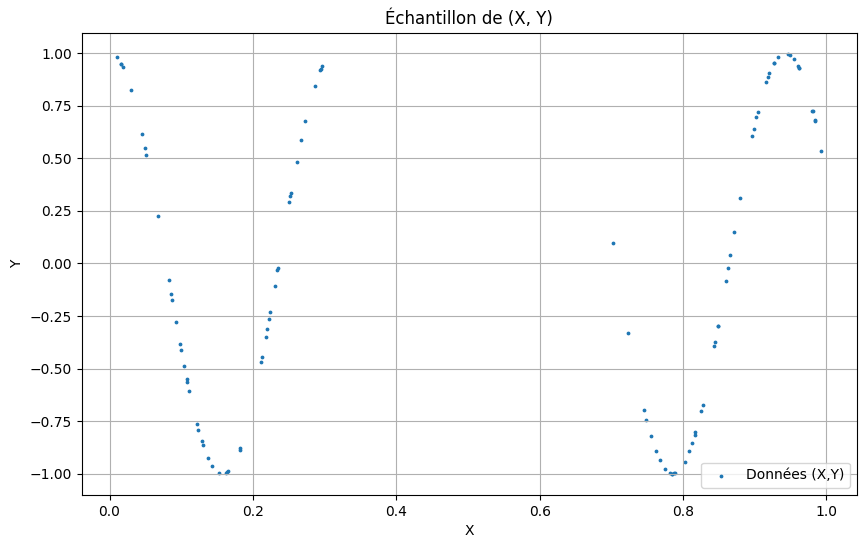

In [41]:
# caracteristiques de la distribution (X,Y)
f = 20       # Plus la frequence est élevée plus le problème est difficile
trou = 0.3     # 0 ou dans (0,0.5)
corrupt = 0    # Pour visualiser que le réseau peut prendre n'importe quelle valeur en 0.5
corrupt_value = 10    # idem
noise_variance = 0.   # variance du bruit

# Définir la taille de l'échantillon
n = 100  # Nombre de points dans l'échantillon

# Génére X
X = genere_X(n,trou,corrupt )
Y = genere_Y(X,f,corrupt_value,noise_variance)

# Afficher (X,Y)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Données (X,Y)', alpha=1, s=3)
plt.title("Échantillon de (X, Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

# Génère un Multi-Layer-Perceptron (MLP) = réseau dense


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (100, 40)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (100, 40)              │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (100, 40)              │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (100, 40)              │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (100, 40)              │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (100, 40)              │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (100, 1)               │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,321 (32.50 KB)

 Trainable params: 8,321 (32.50 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


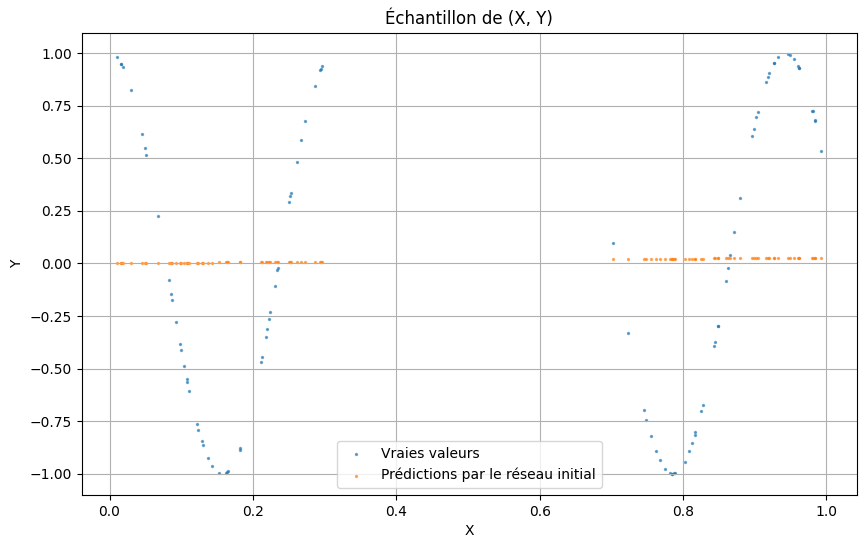

In [42]:
# architecture du réseau
largeur = 40
profondeur = 6
taille_output = 1

# Création du réseau de neurone (initialisation à 0)
model = genere_NN_dense(X,taille_output,largeur,profondeur)

# Affichage du modèle
model.summary()

# Prédiction faite par le réseau initial

Y_pred = model.predict(X)
# Afficher (X,Y)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Vraies valeurs', alpha=0.6, s=2)
plt.scatter(X, Y_pred, label='Prédictions par le réseau initial', alpha=0.6, s=2)
plt.title("Échantillon de (X, Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

# Optimisation du réseau de neurones (i.e. apprentissage)

Erreur quadratique moyenne sur l'ensemble de test : 0.0174
Erreur absolue moyenne sur l'ensemble de test : 0.0603


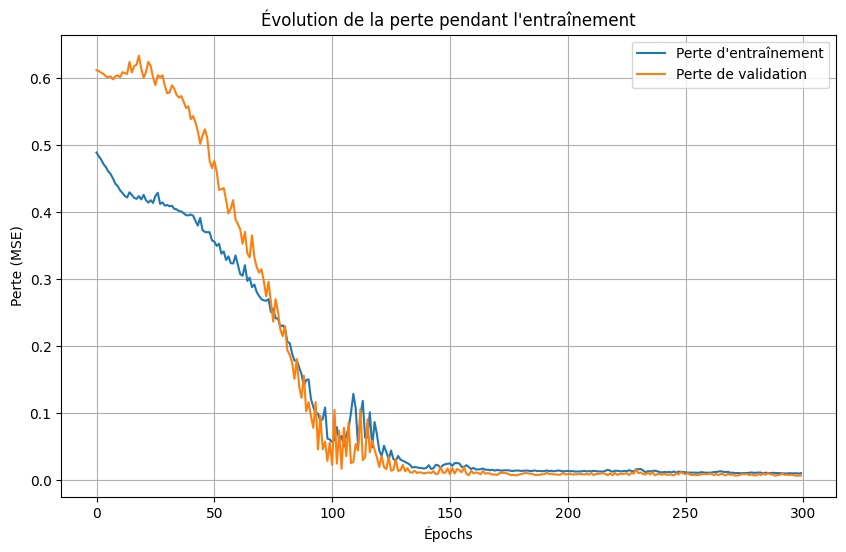

In [43]:
# découpage de l'échantillon
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Compilation du modèle (pour nous : définition de l'optimiseur et de la loss)
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Optimisation des paramètres du modèle
history = model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=0)  # Essayer avec verbose = 1

# Évaluation du modèle
loss, mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"Erreur quadratique moyenne sur l'ensemble de test : {loss:.4f}")
print(f"Erreur absolue moyenne sur l'ensemble de test : {mae:.4f}")

# Visualisation de la perte pendant l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title("Évolution de la perte pendant l'entraînement")
plt.xlabel("Épochs")
plt.ylabel("Perte (MSE)")
plt.legend()
plt.grid()
plt.show()

# Affichage du résultat

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


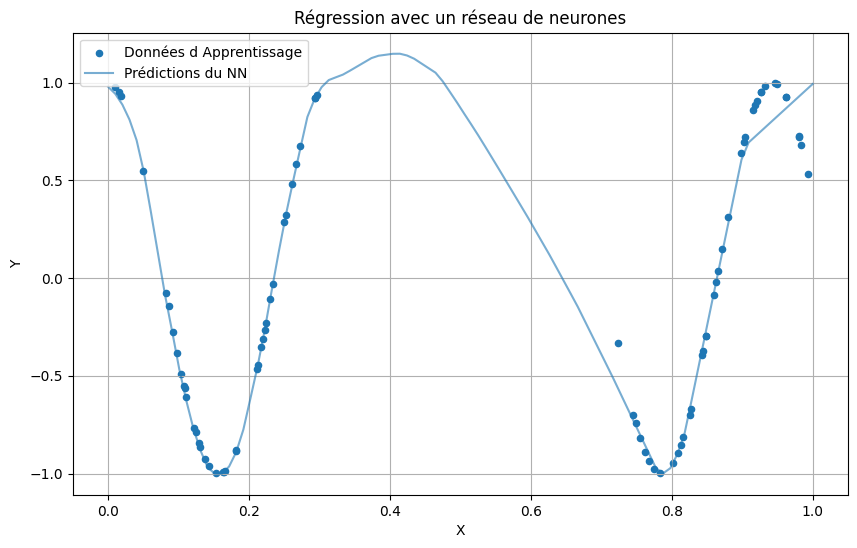

In [45]:
# Affichage des fonctions
X_draw =  np.linspace(0, 1, 100).reshape(-1, 1)
Y_draw_pred = model.predict(X_draw)

# Graphique : données réelles vs prédictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label='Données d Apprentissage', alpha=1, s=20)
plt.plot(X_draw, Y_draw_pred, label='Prédictions du NN', alpha=0.6)
plt.title("Régression avec un réseau de neurones")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

